<a href="https://colab.research.google.com/github/fabienne-lab/CSI4506-IntelligenceArtificielle/blob/main/Projet1CSI4506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet 1 Csi 4506 : Étude empirique pour la classification

## GROUPE 12

> Présenter par: 


        > Willfied Sankara (300100940)

        > Fabienne Sawadogo (300101795)

        > Groupe P1_12








## 1- Compréhension de la tâche de classification

A- Nous travaillerons dans un premier temps avec une classification multi-classe.
  Dans un second temps nous travaillerons sur une classification binaire

B- Ce type de classification nous permettra premièrement de savoir si nos attributs permettent à nos différents modèle de pouvoir classifier le niveau des étudiants avec efficacité.
 Ensuite nous verrons s'il est plus efficace de seulement déterminer si nos modèle fonctionne mieux dans une prédiction qui consiste à savoir si l'étudiant a la moyenne ou pas.


## 2- Analyse du jeu de données

Pour effectuer notre analyse nous avons choisis le dataset intitulée "Students Performance" sur kaegle. Cette banque de données nous permet d'évaluer les notes a l'ecrit et de lecture de certains étudiants basées sur certains facteurs tels que le degree d'étude des parents, l'alimentation, le genre, la race et les travaux de preparation.


Notre jeu de données comporte 1000 données d'entrainements. Il contient également 5 attributs et 2 cibles de classification. C'est à dire une classification sur les notes de lecture et sur les notes d'écritures

### IMPORTATION DES PACKAGES NECESSAIRES POUR L'ÉTUDE

In [ ]:
#importing required packages
import pandas as pd
import seaborn as sns
import numpy as np  
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from seaborn import load_dataset
from sklearn.linear_model import LogisticRegression
#from sklear.linear_model import
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score


%matplotlib inline

### IMPORTATION DU DATASET

In [ ]:
!gdown --id 1hjGa3UkLE_PeDlKAc2WsMHqrnmpC0TpI

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1hjGa3UkLE_PeDlKAc2WsMHqrnmpC0TpI
To: /content/exams.csv
100% 53.7k/53.7k [00:00<00:00, 43.4MB/s]


In [ ]:
#loading dataset
donnees=pd.read_csv('exams.csv', sep=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#column rename
donnees.rename(columns={"race/ethnicity":"race","parental level of education":"parent_education"
                    ,"reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
donnees.head()

,gender,race,parent_education,lunch,pre,reading,writing
0,male,group A,high school,standard,completed,67,63
1,female,group D,some high school,free/reduced,none,59,55
2,male,group E,some college,free/reduced,none,60,50
3,male,group B,high school,standard,none,78,68
4,male,group E,associate's degree,standard,completed,73,68


In [ ]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   race              1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   pre               1000 non-null   object
 5   reading           1000 non-null   int64 
 6   writing           1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
donnees.isnull().sum()

gender              0
race                0
parent_education    0
lunch               0
pre                 0
reading             0
writing             0
dtype: int64

## 3- Explorez les attributs (Feature engineering)

Analysons les performances des etudiants dans chaque domaine relativement aux attributs que nous avons.




### Analyse en fonction du genre

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


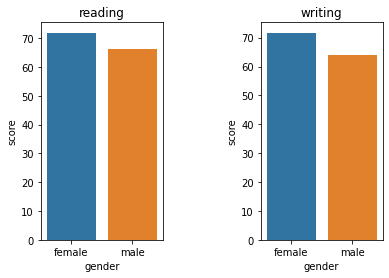

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(2):
    plt.subplot(1,3, idx+1)
    gender_df = donnees.groupby("gender")[list(donnees.columns[-2:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(donnees.columns[-2:])[idx])
    
plt.show(block=True)

#### Conclusion
On peut voir que les Hommes sont légèrement moins bon a l'ecris qu'a la lecture tandis que les femmes gardent la meme tentance. 



### Analyse en fonction du groupe ethnique

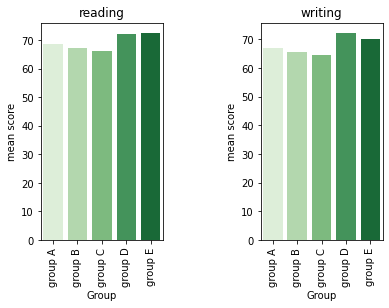

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(2):
    plt.subplot(1,3, idx+1)
    ethn_df = donnees.groupby("race")[list(donnees.columns[-2:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(donnees.columns[-2:])[idx])
plt.show(block = True)



#### Conclusion
On peut voir selon les statistiques les etudiants du groupe A ont les pire notes et les etudiants du groupes E son meilleurs. Ce qui rend l'attribut groupe valable.


### Analyse en fonction des tests de preparation

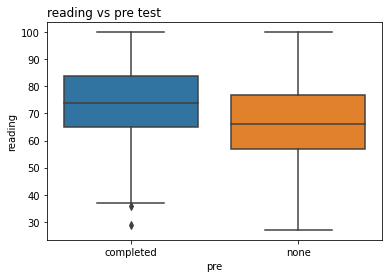

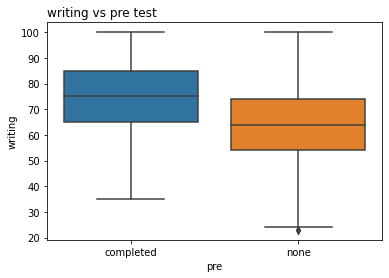

In [ ]:
for item in donnees.columns[-2:]:
    sns.boxplot(x=donnees["pre"], y=donnees[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

#### Conclusion

On peut voir que l'orsque les etudiants effectuent le test de prepation, les notes sont meilleures.



### Analyse en fonction du repas.

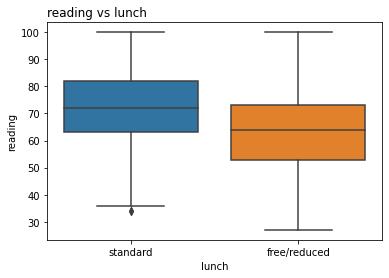

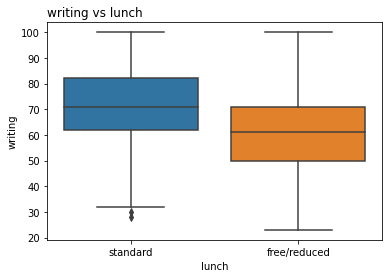

In [ ]:
for item in donnees.columns[-2:]:
    sns.boxplot(x=donnees["lunch"], y=donnees[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

#### Conclusion



Comme on peut le voir les etudiants qui se nourissent mieux excellent plus.
Maintenant on va encoder les donnees pour rendre l'utilisation puls facile




### Analyse en fonction du niveau d'étude des parents

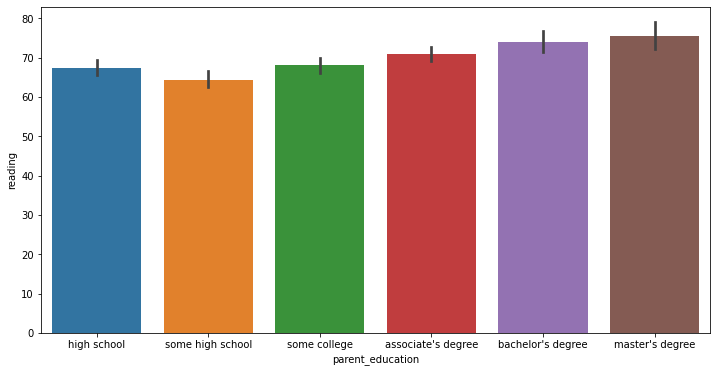

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=donnees, x = "parent_education", y = "reading",ax=ax)


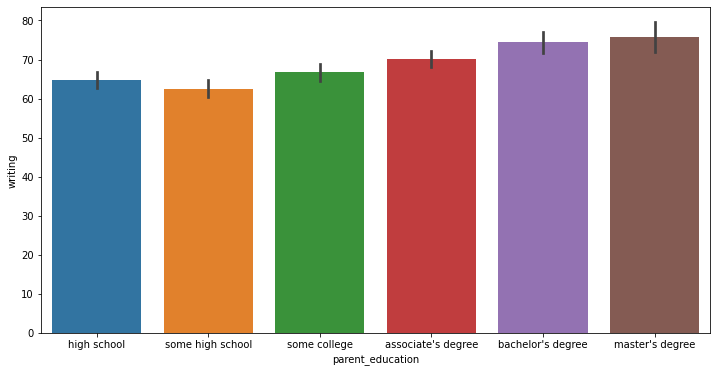

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=donnees, x = "parent_education", y = "writing",ax=ax)

#### Conclusion

Nous constatons que les étudiants avec des parents ayant un niveau d'étude élevé ont de meilleures notes, que ce soit en écriture ou en lecture

#### Utilité des attributs

On se rend compte que ces attributs sont assez utiles pour notre classification. Nous partirons avec une première étude avec ces attributs et nous verrons par la suite s'il y'a lieu d'en ajouter d'autres

## 4- Encodage des attributs
Nous utiliserons un encodage OneHot pour nos différents attributs

In [ ]:
features=['gender','race','parent_education','pre',' lunch']
label = ['reading ', 'writing ']


# Categorical values need to be transformed into numeric.
#donnees['gender'] = donnees['gender'].replace(["female", "male"], [0, 1])
#donnees['lunch'] = donnees['lunch'].replace(["standard", "free/reduced"], [1, 0])
#donnees['race'] = donnees['race'].replace(['group A', 'group B', 'group C','group D','group E'], [1, 2, 3, 4, 5])

#donnees['parent_education'] = donnees['parent_education'].replace(["master's degree", "bachelor's degree", "some high school",'high school','some college',"associate's degree"], [1, 2, 3, 4, 5, 6])
#donnees['pre'] = donnees['pre'].replace(['completed', 'none'], [1, 0])

#One hot encoding
donnees=pd.get_dummies(data=donnees, columns=["pre","race", "parent_education", "gender", "lunch"])


In [ ]:
donnees.head(20)

,reading,writing,pre_completed,pre_none,race_group A,race_group B,race_group C,race_group D,race_group E,parent_education_associate's degree,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,67,63,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,59,55,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
2,60,50,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,78,68,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,73,68,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
5,77,76,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
6,59,63,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7,88,84,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
8,56,65,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
9,42,45,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0


In [ ]:
#preprocessing Data reading score
bins=(1.,50.,70.,80.,100.)
group_names=['mauvais', 'moyen', 'bon','tresBon']
donnees['reading']=pd.cut(donnees['reading'], bins = bins, labels=group_names)


In [ ]:
donnees.head(20)

,reading,writing,pre_completed,pre_none,race_group A,race_group B,race_group C,race_group D,race_group E,parent_education_associate's degree,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,moyen,63,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,moyen,55,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
2,moyen,50,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,bon,68,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,bon,68,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
5,bon,76,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
6,moyen,63,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7,tresBon,84,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
8,moyen,65,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
9,mauvais,45,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0


In [ ]:
bins=(0.,50.,70.,80.,100.)
group_names=['mauvais', 'moyen', 'bon','tresBon']
donnees['writing']=pd.cut(donnees['writing'], bins = bins, labels=group_names)


In [ ]:
donnees.head(20)

,reading,writing,pre_completed,pre_none,race_group A,race_group B,race_group C,race_group D,race_group E,parent_education_associate's degree,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,moyen,moyen,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,moyen,moyen,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0
2,moyen,mauvais,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
3,bon,moyen,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,bon,moyen,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
5,bon,bon,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
6,moyen,moyen,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1
7,tresBon,tresBon,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
8,moyen,moyen,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
9,mauvais,mauvais,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0


In [ ]:
###Repartition de l'effectif en fonction du niveau
donnees['reading'].value_counts()

moyen      404
bon        255
tresBon    228
mauvais    113
Name: reading, dtype: int64

In [ ]:
###Repartition de l'effectif en fonction du niveau
donnees['writing'].value_counts()

moyen      410
tresBon    225
bon        214
mauvais    151
Name: writing, dtype: int64

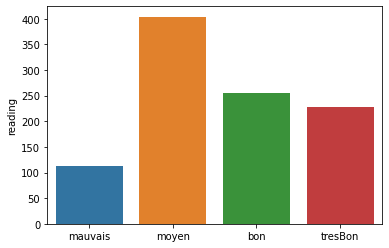

In [ ]:
## Histogramme de la repartition de l'effectif en fonction du niveau
sns.barplot( x = donnees['reading'].value_counts().index,  y= donnees['reading'].value_counts())

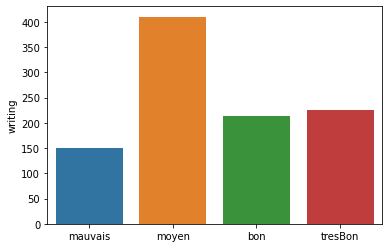

In [ ]:
## Histogramme de la repartition de l'effectif en fonction du niveau
sns.barplot( x = donnees['writing'].value_counts().index,  y= donnees['writing'].value_counts())

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
#Label Encoding
donnees["reading"] = le.fit_transform(donnees["reading"])
donnees["writing"] = le.fit_transform(donnees["writing"])

In [ ]:
donnees["reading"].value_counts()

2    404
0    255
3    228
1    113
Name: reading, dtype: int64

In [ ]:
donnees["writing"].value_counts()

2    410
3    225
0    214
1    151
Name: writing, dtype: int64

In [ ]:
X=donnees.drop(["reading", "writing"] , axis=1)
y1=donnees["reading"]
y2=donnees["writing"]



## 5 - Validation croisée

In [ ]:
#validation croisée avec k = 3

kf=KFold(n_splits=3)

In [ ]:
print(kf)

KFold(n_splits=3, random_state=None, shuffle=False)


In [ ]:
for train_index, test_index in kf.split(X):
        X_train_1, X_test_1 = X.iloc[train_index], X.iloc[test_index]
        y1_train_1, y1_test_1 = y1.iloc[train_index], y1.iloc[test_index]
        y2_train_1, y2_test_1 = y2.iloc[train_index], y2.iloc[test_index]



## 6 , 7 , 8 , 9 - ENTRAINEMENT ET TESTS, EVALUATION 

### TESTS 1


#### Entrainement avec Naive Bayes


In [ ]:
#train and test data pour le y1 (c'est à dire le "reading")
clf=MultinomialNB()
clf.fit(X_train_1,y1_train_1)

MultinomialNB()

In [ ]:
y1_pred_NB=clf.predict(X_test_1)



In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_NB))

              precision    recall  f1-score   support

           0       0.24      0.14      0.18        72
           1       0.50      0.05      0.09        41
           2       0.46      0.74      0.57       141
           3       0.52      0.39      0.45        79

    accuracy                           0.44       333
   macro avg       0.43      0.33      0.32       333
weighted avg       0.43      0.44      0.39       333



In [ ]:
#train and test data pour y2 (c'est à dire pour le "writing")
clf=MultinomialNB()
clf.fit(X_train_1,y2_train_1)

MultinomialNB()

In [ ]:

y2_pred_NB=clf.predict(X_test_1)


In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_NB))

              precision    recall  f1-score   support

           0       0.26      0.07      0.11        69
           1       0.44      0.15      0.22        54
           2       0.46      0.75      0.57       139
           3       0.51      0.52      0.52        71

    accuracy                           0.46       333
   macro avg       0.42      0.37      0.36       333
weighted avg       0.43      0.46      0.41       333



#### Entrainement avec la Régression Logistique


In [ ]:
model = LogisticRegression()

In [ ]:
#Train for "reading"
model.fit(X_train_1, y1_train_1)

LogisticRegression()

In [ ]:
#Test for "reading"
y1_pred_RL=model.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_RL))

              precision    recall  f1-score   support

           0       0.23      0.08      0.12        72
           1       0.36      0.12      0.18        41
           2       0.45      0.72      0.55       141
           3       0.48      0.42      0.45        79

    accuracy                           0.44       333
   macro avg       0.38      0.33      0.33       333
weighted avg       0.40      0.44      0.39       333



In [ ]:
#Train for "writing"
model.fit(X_train_1, y2_train_1)

LogisticRegression()

In [ ]:
#Test for "writing"
y2_pred_RL=model.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_RL))

              precision    recall  f1-score   support

           0       0.26      0.09      0.13        69
           1       0.44      0.13      0.20        54
           2       0.45      0.71      0.55       139
           3       0.53      0.56      0.54        71

    accuracy                           0.46       333
   macro avg       0.42      0.37      0.36       333
weighted avg       0.43      0.46      0.41       333



#### Multilayer Perceptron

In [ ]:
mlp=MLPClassifier()


In [ ]:
mlp.fit(X_train_1,y1_train_1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
y1_pred_MLP=mlp.predict(X_test_1)


In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_MLP))

              precision    recall  f1-score   support

           0       0.11      0.07      0.09        72
           1       0.41      0.17      0.24        41
           2       0.47      0.64      0.54       141
           3       0.46      0.46      0.46        79

    accuracy                           0.41       333
   macro avg       0.36      0.33      0.33       333
weighted avg       0.38      0.41      0.39       333



In [ ]:
mlp.fit(X_train_1, y2_train_1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
y2_pred_MLP=mlp.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_MLP))

              precision    recall  f1-score   support

           0       0.31      0.16      0.21        69
           1       0.45      0.26      0.33        54
           2       0.51      0.65      0.57       139
           3       0.45      0.56      0.50        71

    accuracy                           0.47       333
   macro avg       0.43      0.41      0.40       333
weighted avg       0.45      0.47      0.44       333



### TESTS 2


#### Entrainement avec Naive Bayes


**Nous allons modifier le paramètre alpha de la valeur par defaut (1.0) à une valeure de 2.0**

In [ ]:
#train and test data pour le y1 (c'est à dire le "reading") en changeant le alpha de 1.0 à 2.0
clf_2=MultinomialNB(alpha=2.0)
clf_2.fit(X_train_1,y1_train_1)

MultinomialNB(alpha=2.0)

In [ ]:
y1_pred_NB_2=clf_2.predict(X_test_1)


In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_NB_2))

              precision    recall  f1-score   support

           0       0.24      0.12      0.17        72
           1       0.50      0.05      0.09        41
           2       0.46      0.77      0.58       141
           3       0.53      0.39      0.45        79

    accuracy                           0.45       333
   macro avg       0.43      0.33      0.32       333
weighted avg       0.44      0.45      0.40       333



In [ ]:
#train and test data pour y2 (c'est à dire pour le "writing")
clf_2.fit(X_train_1,y2_train_1)

MultinomialNB(alpha=2.0)

In [ ]:
y2_pred_NB_2=clf_2.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_NB_2))

              precision    recall  f1-score   support

           0       0.33      0.07      0.12        69
           1       0.44      0.15      0.22        54
           2       0.47      0.77      0.58       139
           3       0.51      0.52      0.52        71

    accuracy                           0.47       333
   macro avg       0.44      0.38      0.36       333
weighted avg       0.45      0.47      0.41       333



#### Entrainement avec la Régression Logistique


**Nous allons essayer de changer l'algorithme utilisé pour le solver. Nous allons passer à solver = "liblinear"**

In [ ]:
model_2 = LogisticRegression(solver='liblinear')

In [ ]:
#Train for "reading"
model_2.fit(X_train_1, y1_train_1)

LogisticRegression(solver='liblinear')

In [ ]:
#Test for "reading"
y1_pred_RL_2=model_2.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_RL_2))

              precision    recall  f1-score   support

           0       0.24      0.08      0.12        72
           1       0.50      0.05      0.09        41
           2       0.46      0.77      0.58       141
           3       0.47      0.42      0.44        79

    accuracy                           0.45       333
   macro avg       0.42      0.33      0.31       333
weighted avg       0.42      0.45      0.39       333



In [ ]:
#Train for "writing"
model_2.fit(X_train_1, y2_train_1)

LogisticRegression(solver='liblinear')

In [ ]:
#Test for "writing"
y2_pred_RL_2=model_2.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_RL_2))

              precision    recall  f1-score   support

           0       0.36      0.07      0.12        69
           1       0.50      0.07      0.13        54
           2       0.46      0.78      0.58       139
           3       0.53      0.56      0.54        71

    accuracy                           0.47       333
   macro avg       0.46      0.37      0.34       333
weighted avg       0.46      0.47      0.41       333



#### Multilayer Perceptron

**AU NIVEAU DU MLP NOUS ALLONS PLUTÔT MODIFIER LE NOMBRE D'ITERATIONS DE 300 À 1000**

In [ ]:
mlp_2=MLPClassifier(max_iter=1000)


In [ ]:
mlp_2.fit(X_train_1,y1_train_1)

MLPClassifier(max_iter=1000)

In [ ]:
y1_pred_MLP_2=mlp_2.predict(X_test_1)


In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_MLP_2))

              precision    recall  f1-score   support

           0       0.16      0.15      0.15        72
           1       0.47      0.17      0.25        41
           2       0.47      0.53      0.50       141
           3       0.44      0.48      0.46        79

    accuracy                           0.39       333
   macro avg       0.38      0.33      0.34       333
weighted avg       0.39      0.39      0.38       333



In [ ]:
mlp_2.fit(X_train_1, y2_train_1)

MLPClassifier(max_iter=1000)

In [ ]:
y2_pred_MLP_2=mlp_2.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_MLP_2))

              precision    recall  f1-score   support

           0       0.32      0.16      0.21        69
           1       0.38      0.33      0.36        54
           2       0.48      0.55      0.51       139
           3       0.46      0.61      0.52        71

    accuracy                           0.44       333
   macro avg       0.41      0.41      0.40       333
weighted avg       0.43      0.44      0.43       333



### TESTS 3


#### Entrainement avec Naive Bayes


**Nous allons modifier le paramètre alpha de la valeur par defaut (1.0) à une valeure de 5.0**

In [ ]:
#train and test data pour le y1 (c'est à dire le "reading")
clf_3=MultinomialNB(alpha=5.0)
clf_3.fit(X_train_1,y1_train_1)

MultinomialNB(alpha=5.0)

In [ ]:
y1_pred_NB_3=clf_3.predict(X_test_1)


In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_NB_3))

              precision    recall  f1-score   support

           0       0.26      0.12      0.17        72
           1       0.50      0.05      0.09        41
           2       0.47      0.78      0.58       141
           3       0.53      0.39      0.45        79

    accuracy                           0.46       333
   macro avg       0.44      0.34      0.32       333
weighted avg       0.44      0.46      0.40       333



In [ ]:
#train and test data pour y2 (c'est à dire pour le "writing")
clf_3.fit(X_train_1,y2_train_1)

MultinomialNB(alpha=5.0)

In [ ]:
y2_pred_NB_3=clf_3.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_NB_3))

              precision    recall  f1-score   support

           0       0.42      0.07      0.12        69
           1       0.56      0.09      0.16        54
           2       0.47      0.83      0.60       139
           3       0.52      0.51      0.51        71

    accuracy                           0.48       333
   macro avg       0.49      0.37      0.35       333
weighted avg       0.49      0.48      0.41       333



#### Entrainement avec la Régression Logistique


**Nous allons changer le type d'erreur de l2 à l1 et nous utiliserons comme solver = "saga"**

In [ ]:
model_3 = LogisticRegression(penalty='l1', solver = 'saga')

In [ ]:
#Train for "reading"
model_3.fit(X_train_1, y1_train_1)

LogisticRegression(penalty='l1', solver='saga')

In [ ]:
#Test for "reading"
y1_pred_RL_3=model_3.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_RL_3))

              precision    recall  f1-score   support

           0       0.29      0.08      0.13        72
           1       0.36      0.12      0.18        41
           2       0.46      0.74      0.57       141
           3       0.49      0.42      0.45        79

    accuracy                           0.45       333
   macro avg       0.40      0.34      0.33       333
weighted avg       0.41      0.45      0.40       333



In [ ]:
#Train for "writing"
model_3.fit(X_train_1, y2_train_1)

LogisticRegression(penalty='l1', solver='saga')

In [ ]:
#Test for "writing"
y2_pred_RL_3=model_3.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_RL_3))

              precision    recall  f1-score   support

           0       0.33      0.09      0.14        69
           1       0.44      0.13      0.20        54
           2       0.46      0.74      0.57       139
           3       0.53      0.56      0.54        71

    accuracy                           0.47       333
   macro avg       0.44      0.38      0.36       333
weighted avg       0.45      0.47      0.41       333



#### Multilayer Perceptron

**AU NIVEAU DU MLP NOUS ALLONS MODIFIER LE NOMBRE D'ITERATIONS DE 300 À 1000 TOUT EN MODIFIANT LA VALEUR DE ALPHA À 0.0005**

In [ ]:
mlp_3=MLPClassifier(alpha = 0.0005,max_iter=1000)


In [ ]:
mlp_3.fit(X_train_1,y1_train_1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.0005, max_iter=1000)

In [ ]:
y1_pred_MLP_3=mlp_3.predict(X_test_1)


In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_1,y1_pred_MLP_3))

              precision    recall  f1-score   support

           0       0.18      0.18      0.18        72
           1       0.31      0.27      0.29        41
           2       0.46      0.50      0.48       141
           3       0.47      0.46      0.46        79

    accuracy                           0.39       333
   macro avg       0.36      0.35      0.35       333
weighted avg       0.39      0.39      0.39       333



In [ ]:
mlp_3.fit(X_train_1, y2_train_1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.0005, max_iter=1000)

In [ ]:
y2_pred_MLP_3=mlp_3.predict(X_test_1)

In [ ]:
#Precison,recall and accuracy score  per class for y2
print(metrics.classification_report(y2_test_1,y2_pred_MLP_3))

              precision    recall  f1-score   support

           0       0.33      0.19      0.24        69
           1       0.34      0.22      0.27        54
           2       0.51      0.62      0.56       139
           3       0.47      0.58      0.52        71

    accuracy                           0.46       333
   macro avg       0.41      0.40      0.40       333
weighted avg       0.43      0.46      0.44       333



## 10 - COMPARAISON DES RÉSULTATS ET EXEMPLES DE FAUX  NÉGATIFS

### Comparaison des résultats

In [ ]:
#precision
def precision_genNB (test,NB_1,NB_2,NB_3) :
  dataNB = []
  dataNB.append(precision_score(test,NB_1,average = "macro"))
  dataNB.append(precision_score(test,NB_2,average = "macro"))
  dataNB.append(precision_score(test,NB_3,average = "macro"))

  return dataNB

def precision_genRL (test,RL_1,RL_2,RL_3) :

  dataRL = []
  dataRL.append(precision_score(test,RL_1,average = "macro"))
  dataRL.append(precision_score(test,RL_2,average = "macro"))
  dataRL.append(precision_score(test,RL_3,average = "macro"))

  return dataRL

def precision_genMLP (test,MLP_1,MLP_2,MLP_3) :

  dataMLP = []
  dataMLP.append(precision_score(test,MLP_1,average = "macro"))
  dataMLP.append(precision_score(test,MLP_2,average = "macro"))
  dataMLP.append(precision_score(test,MLP_3,average = "macro"))

  return dataMLP

#recall
def recall_genNB (test,NB_1,NB_2,NB_3) :
  dataNB = []
  dataNB.append(recall_score(test,NB_1,average = "macro"))
  dataNB.append(recall_score(test,NB_2,average = "macro"))
  dataNB.append(recall_score(test,NB_3,average = "macro"))

  return dataNB

def recall_genRL (test,RL_1,RL_2,RL_3) :

  dataRL = []
  dataRL.append(recall_score(test,RL_1,average = "macro"))
  dataRL.append(recall_score(test,RL_2,average = "macro"))
  dataRL.append(recall_score(test,RL_3,average = "macro"))

  return dataRL

def recall_genMLP (test,MLP_1,MLP_2,MLP_3) :

  dataMLP = []
  dataMLP.append(recall_score(test,MLP_1,average = "macro"))
  dataMLP.append(recall_score(test,MLP_2,average = "macro"))
  dataMLP.append(recall_score(test,MLP_3,average = "macro"))

  return dataMLP


#### Score de précision

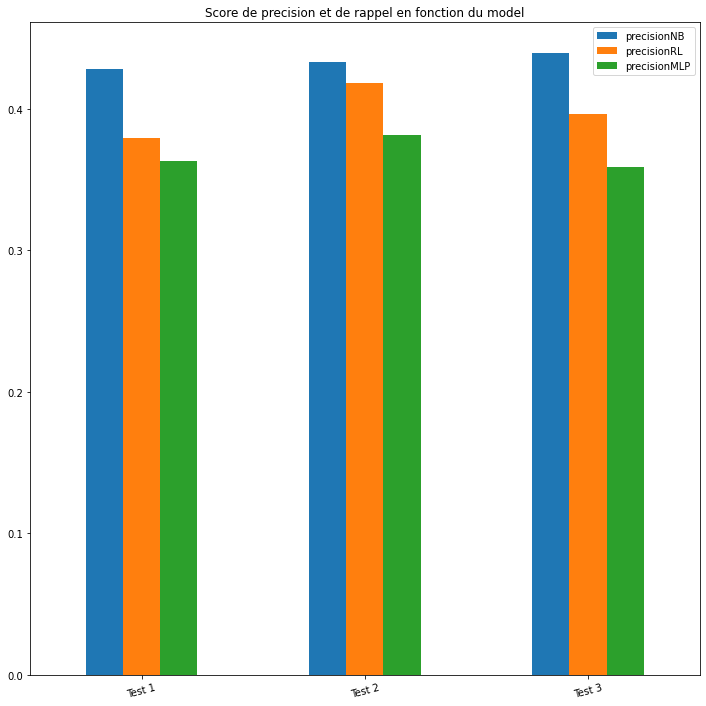

In [ ]:
#Y1 ("Reading") precision and recall score comparaison
y1_t = {"precisionNB":precision_genNB(y1_test_1,y1_pred_NB,y1_pred_NB_2,y1_pred_NB_3),
                      "precisionRL" :precision_genRL(y1_test_1,y1_pred_RL,y1_pred_RL_2,y1_pred_RL_3),
         "precisionMLP":precision_genMLP(y1_test_1,y1_pred_MLP,y1_pred_MLP_2,y1_pred_MLP_3)}
index = ["Test 1","Test 2","Test 3"]
df_y1_t = pd.DataFrame(y1_t,index=index)

df_y1_t.plot.bar(figsize=(12,12),rot = 15 ,title = "Score de precision et de rappel en fonction du model")
plt.show(block=True);

**Conclusion**

On constate que dans tous les 3 test le score de précison du Naïve Bayes est le plus elevé des 3 modèles.
En modifiant certains paramètres au niveau du percepron multicouche(nombre d'itérations on se retrouve avec de meilleurs résultats de précision.

Néanmoins tous nos scores de précisions sont inférieurs à 0.5, ce qui implique que nous avons beaucoup de faux positifs en général dans avec nos modèles

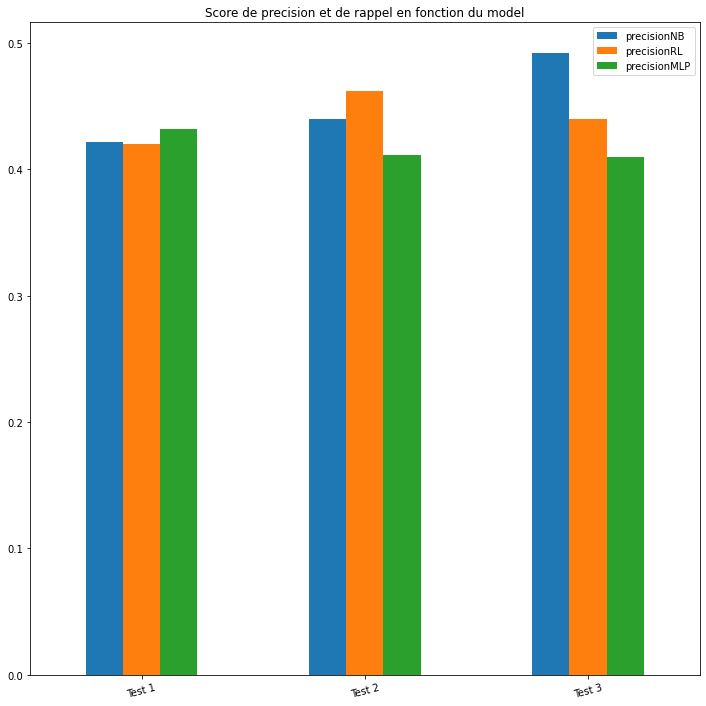

In [ ]:
#Y2 ("Writing") precision and recall score comparaison
y2_t = {"precisionNB":precision_genNB(y2_test_1,y2_pred_NB,y2_pred_NB_2,y2_pred_NB_3),
                      "precisionRL" :precision_genRL(y2_test_1,y2_pred_RL,y2_pred_RL_2,y2_pred_RL_3),
         "precisionMLP":precision_genMLP(y2_test_1,y2_pred_MLP,y2_pred_MLP_2,y2_pred_MLP_3)}
index = ["Test 1","Test 2","Test 3"]
df_y2_t = pd.DataFrame(y2_t,index=index)

df_y2_t.plot.bar(figsize=(12,12),rot = 15 ,title = "Score de precision et de rappel en fonction du model")
plt.show(block=True);

**Conclusion**

Pour la classification du niveau d'écriture, on se rend compte que le naïves bayes a toujours ke plus haut score surtout au niveau de la série de test 3 où nous avons modifié la valeur de alpha de 1.0 à 5.0

Nos valeurs ici sont toujours inférieurs à 0.5, ce qui nous montre que nous avons beaucoup de faux positifs également

#### Score de rappel

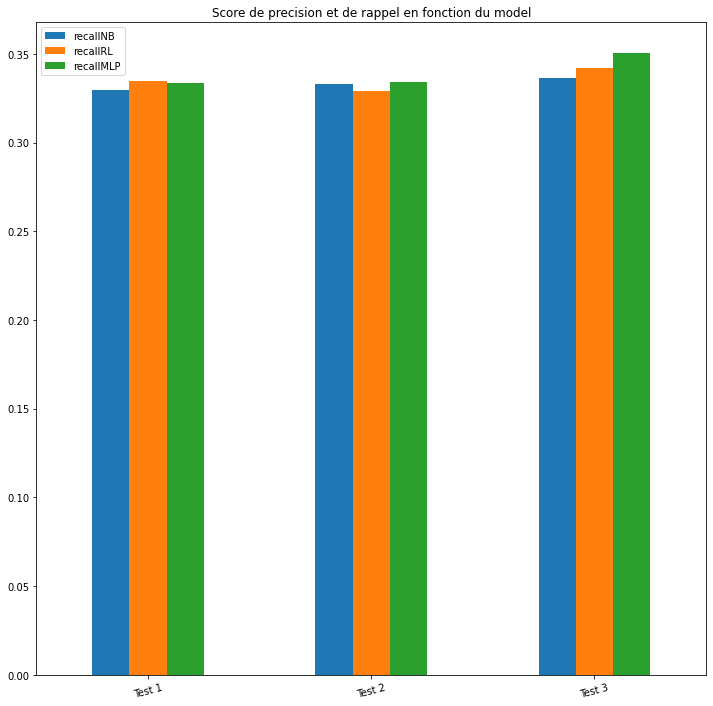

In [ ]:
#Y1 ("Reading")  recall score comparaison
y1_t1 = {"recallNB":recall_genNB(y1_test_1,y1_pred_NB,y1_pred_NB_2,y1_pred_NB_3),
                      "recallRL" :recall_genRL(y1_test_1,y1_pred_RL,y1_pred_RL_2,y1_pred_RL_3),
         "recallMLP":recall_genMLP(y1_test_1,y1_pred_MLP,y1_pred_MLP_2,y1_pred_MLP_3)}
index = ["Test 1","Test 2","Test 3"]
df_y1_t1 = pd.DataFrame(y1_t1,index=index)

df_y1_t1.plot.bar(figsize=(12,12),rot = 15 ,title = "Score de precision et de rappel en fonction du model")
plt.show(block=True);

**Conclusion**

Le score  de rappel du MLP est le meilleur dans chacun de nos test. Les scores de rappel du Naive Bayes et de a Regression Logistique sont très proches et les différences sont minimes.

Nos scores de rappel sont inférieurs à 0.5, ce qui montre que nous avons beaucoup de faux négatifs dans les 3 cas. Mais nous en avons moins que les autres avec le perceptron multicouche

### Exemples de faux négatifs

In [ ]:
def gold_standard_prediction(gold_standard,predicted) :
  gold_s = np.array(gold_standard)
  data = []
  for i in range(0,len(gold_standard)):
    data.append([gold_s[i],predicted[i]])
  
  df = pd.DataFrame(data=data, columns=["Gold Standard","Predicted"])
  return df

###### **Exemple pour le Naives Bayes du test 1**

In [ ]:
display(gold_standard_prediction(y1_test_1,y1_pred_NB))

,Gold Standard,Predicted
0,2,2
1,2,2
2,1,2
3,1,2
4,3,3
...,...,...
328,2,2
329,3,2
330,1,2
331,0,2


* Quelques exemples de faux positifs sur la classe 0 : Faux positif indexe 34 dans le tableau ci-dessus 

* Quelques exemples de faux négatifs sur la classe 0 : Faux négatif a l'indexe 23 du tableau ci-dessus

###### **Exemple pour la Regression Logistique du test 1**

In [ ]:
display(gold_standard_prediction(y1_test_1,y1_pred_RL))

,Gold Standard,Predicted
0,2,1
1,2,2
2,1,2
3,1,2
4,3,3
...,...,...
328,2,2
329,3,2
330,1,2
331,0,2



* Quelques exemples de faux positifs sur la classe 3: Index 20

* Quelques exemples de faux négatif sur la classe 3 : Index 23 et 24.

###### **Exemple pour le Perceptron Multicouche du test 1**


In [ ]:
display(gold_standard_prediction(y1_test_1,y1_pred_MLP))

,Gold Standard,Predicted
0,2,2
1,2,0
2,1,2
3,1,2
4,3,3
...,...,...
328,2,2
329,3,0
330,1,2
331,0,2


 * Quelques exemples de faux positif sur la classe 2 : Index 17

 * Quelques exemples de faux négatif sur la classe 2: Index 0

###### **Exemple pour le Naive Bayes du test 2**

In [ ]:
display(gold_standard_prediction(y1_test_1,y2_pred_NB_2))

,Gold Standard,Predicted
0,2,1
1,2,2
2,1,2
3,1,2
4,3,3
...,...,...
328,2,2
329,3,2
330,1,2
331,0,2





*   Exemples de faux positifs sur la classe 3  : Index 7
*   Exemples de faux négatifs sur la classe 3 : Index 16



###### **Exemple pour le perceptron multicouche du test 2**

In [ ]:
display(gold_standard_prediction(y1_test_1,y1_pred_MLP_2))

,Gold Standard,Predicted
0,2,2
1,2,0
2,1,2
3,1,2
4,3,3
...,...,...
328,2,0
329,3,0
330,1,2
331,0,2




*   Exemple de faux positifs sur la classe 0 : Index 5, 11
*   Exemple de faux négatifs sur la classe 0 : Index 6, 7, 9



###### **Exemple pour la regression logistique du test 2**

In [ ]:
display(gold_standard_prediction(y1_test_1,y1_pred_RL_2))

,Gold Standard,Predicted
0,2,2
1,2,2
2,1,2
3,1,2
4,3,3
...,...,...
328,2,2
329,3,2
330,1,2
331,0,2




*   Exemple de faux positif sur la classe 1: Index 87
*   Exemple de faux négatif sur la classe 1: Index 8, 17



###### **Exemple sur le Perceptron Multicouche du test 3**



In [ ]:
display(gold_standard_prediction(y1_test_1,y1_pred_MLP_3))

,Gold Standard,Predicted
0,2,1
1,2,0
2,1,2
3,1,2
4,3,3
...,...,...
328,2,0
329,3,0
330,1,0
331,0,2




*   Exemple de faux positifs sur la classe 0 : Index 5 et 11.
*  Exemple de faux négatif sur la classe 0 : Index 0, 6 et 7.





# **RÉORIENTATION DE LA CLASSIFICATION**

EN ÉTUDIANT DIFFÉRENTS MODELS ET EN CHANGEANT LES PARAMETRES, NOUS NOUS SOMMES RENDUS COMPTE QU'IL EST DIFFICILE POUR NOS MODÈLES DE POUVOIR FAIRE DE BONNE DE PRÉDICTIONS SUR LE NIVEAU DES ÉTUDIANTS, QUE CE SOIT POUR LA LECTURE OU POUR L'ÉCRITURE.

NOUS ALLONS RÉORIENTER NOTRE ANALYSE, SUR UN SYSTÈME BINAIRE VISANT À SAVOIR SI L'ÉLÈVE A PASSÉ LE TEST OU NON (S'IL A PLUS DE 50% OU NON)

## DATA PREPROCESSING




In [ ]:
#reloading dataset
donnees_1 = donnees=pd.read_csv('exams.csv', sep=';')
donnees_1.rename(columns={"race/ethnicity":"race","parental level of education":"parent_education"
                    ,"reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)

donnees_1.head(10)

,gender,race,parent_education,lunch,pre,reading,writing
0,male,group A,high school,standard,completed,67,63
1,female,group D,some high school,free/reduced,none,59,55
2,male,group E,some college,free/reduced,none,60,50
3,male,group B,high school,standard,none,78,68
4,male,group E,associate's degree,standard,completed,73,68
5,female,group D,high school,standard,none,77,76
6,female,group A,bachelor's degree,standard,none,59,63
7,male,group E,some college,standard,completed,88,84
8,male,group D,high school,standard,none,56,65
9,male,group C,some college,free/reduced,none,42,45


In [ ]:
features=['gender','race','parent_education','pre',' lunch']
label = ['reading ', 'writing ']


# Categorical values need to be transformed into numeric.
donnees_1['gender'] = donnees_1['gender'].replace(["female", "male"], [0, 1])
donnees_1['lunch'] = donnees_1['lunch'].replace(["standard", "free/reduced"], [1, 0])
donnees_1['race'] = donnees_1['race'].replace(['group A', 'group B', 'group C','group D','group E'], [1, 2, 3, 4, 5])

donnees_1['parent_education'] = donnees_1['parent_education'].replace(["master's degree", "bachelor's degree", "some high school",'high school','some college',"associate's degree"], [1, 2, 3, 4, 5, 6])
donnees_1['pre'] = donnees_1['pre'].replace(['completed', 'none'], [1, 0])

#One hot encoding
donnees_1=pd.get_dummies(data=donnees_1, columns=["pre","race", "parent_education", "gender", "lunch"])

In [ ]:
#preprocessing Data reading score
bins_1 =(0,50,100)
group_names_1=['echec','succes']
donnees_1['reading']=pd.cut(donnees_1['reading'], bins = bins_1, labels=group_names_1)
donnees_1['reading'].unique()

['succes', 'echec']
Categories (2, object): ['echec' < 'succes']

In [ ]:
label_quality = LabelEncoder()
donnees_1['reading']= label_quality.fit_transform(donnees_1['reading'])

In [ ]:
donnees_1['reading'].value_counts()

1    887
0    113
Name: reading, dtype: int64

In [ ]:
bins=(0,50,100)
group_names=['echec','succes']
donnees_1['writing']=pd.cut(donnees_1['writing'], bins = bins, labels=group_names)
donnees_1['writing'].unique()

['succes', 'echec']
Categories (2, object): ['echec' < 'succes']

In [ ]:
donnees_1['writing']= label_quality.fit_transform(donnees_1['writing'])

In [ ]:
donnees_1['writing'].value_counts()

1    849
0    151
Name: writing, dtype: int64

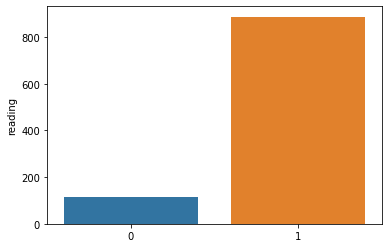

In [ ]:
##HISTOGRAMME DE MONTRANT LE NOMBRE DE PERSONNES AYANT ECHOUÉ OU RÉUSSI LE TEST DE LECTURE

sns.barplot( x = donnees_1['reading'].value_counts().index,  y= donnees_1['reading'].value_counts())

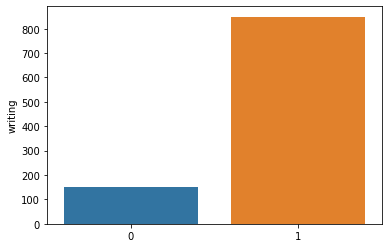

In [ ]:
sns.barplot( x = donnees_1['writing'].value_counts().index,  y= donnees_1['writing'].value_counts())

In [ ]:
X_1=donnees_1.drop(["reading", "writing"] , axis=1)
y1_1=donnees_1["reading"]
y2_1=donnees_1["writing"]

In [ ]:
#validation croisée avec k = 3

kf_1=KFold(n_splits=3)

In [ ]:
for train_index, test_index in kf_1.split(X):
        X_train_2, X_test_2 = X_1.iloc[train_index], X_1.iloc[test_index]
        y1_train_2, y1_test_2 = y1_1.iloc[train_index], y1_1.iloc[test_index]
        y2_train_2, y2_test_2 = y2_1.iloc[train_index], y2_1.iloc[test_index]

## TRAIN AND TEST

### NAIVE BAYES

In [ ]:
NB = GaussianNB()

In [ ]:
#train
NB.fit(X_train_2,y1_train_2)

GaussianNB()

In [ ]:
y1_pred_GNB = NB.predict(X_test_2)

In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_2,y1_pred_GNB))

              precision    recall  f1-score   support

           0       0.31      0.54      0.39        41
           1       0.93      0.83      0.88       292

    accuracy                           0.80       333
   macro avg       0.62      0.68      0.64       333
weighted avg       0.85      0.80      0.82       333



In [ ]:
# train 
NB.fit(X_train_2,y2_train_2)

GaussianNB()

In [ ]:
y2_pred_GNB = NB.predict(X_test_2)

In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y2_test_2,y2_pred_GNB))

              precision    recall  f1-score   support

           0       0.38      0.65      0.48        54
           1       0.92      0.79      0.85       279

    accuracy                           0.77       333
   macro avg       0.65      0.72      0.66       333
weighted avg       0.83      0.77      0.79       333



### LOGISTIC REGRESSION

In [ ]:
#train and test
model = LogisticRegression()
model.fit(X_train_2,y1_train_2)
y1_pred_RL_11 = model.predict(X_test_2)

#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_2,y1_pred_RL_11))

              precision    recall  f1-score   support

           0       0.36      0.12      0.18        41
           1       0.89      0.97      0.93       292

    accuracy                           0.86       333
   macro avg       0.62      0.55      0.55       333
weighted avg       0.82      0.86      0.83       333



In [ ]:
model.fit(X_train_2,y2_train_2)

LogisticRegression()

In [ ]:
y2_pred_RL_11 = model.predict(X_test_2)

In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y2_test_2,y2_pred_RL_11))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        54
           1       0.86      0.97      0.91       279

    accuracy                           0.84       333
   macro avg       0.68      0.57      0.58       333
weighted avg       0.80      0.84      0.80       333



### PERCEPTRON MULTICOUCHE

In [ ]:
#train and test
mlp = MLPClassifier()
mlp.fit(X_train_2,y1_train_2)
y1_pred_mlp_11 = model.predict(X_test_2)

#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_2,y1_pred_mlp_11))

              precision    recall  f1-score   support

           0       0.39      0.17      0.24        41
           1       0.89      0.96      0.93       292

    accuracy                           0.86       333
   macro avg       0.64      0.57      0.58       333
weighted avg       0.83      0.86      0.84       333



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
mlp.fit(X_train_2,y2_train_2)
y2_pred_mlp_11 = model.predict(X_test_2)

#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y2_test_2,y2_pred_mlp_11))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        54
           1       0.86      0.97      0.91       279

    accuracy                           0.84       333
   macro avg       0.68      0.57      0.58       333
weighted avg       0.80      0.84      0.80       333



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### SVM

In [ ]:
# Train and test
svm = svm.SVC()
svm.fit(X_train_2,y1_train_2)
y1_pred_svm_11 = model.predict(X_test_2)

In [ ]:
#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y1_test_2,y1_pred_svm_11))

              precision    recall  f1-score   support

           0       0.39      0.17      0.24        41
           1       0.89      0.96      0.93       292

    accuracy                           0.86       333
   macro avg       0.64      0.57      0.58       333
weighted avg       0.83      0.86      0.84       333



In [ ]:
# Train and test
svm.fit(X_train_2,y2_train_2)
y2_pred_svm_11 = model.predict(X_test_2)

#Precison,recall and accuracy score  per class for y1
print(metrics.classification_report(y2_test_2,y2_pred_svm_11))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        54
           1       0.86      0.97      0.91       279

    accuracy                           0.84       333
   macro avg       0.68      0.57      0.58       333
weighted avg       0.80      0.84      0.80       333



### ANALYSE DES SORTIES DES TESTS

In [ ]:
def precision_gen (test,NB,RL,MLP,SVM) :
  data = []
  data.append(precision_score(test,NB,average = "macro"))
  data.append(precision_score(test,RL,average = "macro"))
  data.append(precision_score(test,MLP,average = "macro"))
  data.append(precision_score(test,SVM,average = "macro"))
  return data

def recall_gen (test,NB,RL,MLP,SVM) :
  data = []
  data.append(recall_score(test,NB,average = "macro"))
  data.append(recall_score(test,RL,average = "macro"))
  data.append(recall_score(test,MLP,average = "macro"))
  data.append(recall_score(test,SVM,average = "macro"))
  return data 


##### 1- Comparaison des mesures précision/rapel du test 1

In [ ]:
#Y1 ("Reading") precision and recall score comparaison
y1_t1_12 = {"precision":precision_gen(y1_test_2,y1_pred_GNB,y1_pred_RL_11,y1_pred_mlp_11,y1_pred_svm_11),
                      "recall" :recall_gen(y1_test_2,y1_pred_GNB,y1_pred_RL_11,y1_pred_mlp_11,y1_pred_svm_11)}
index = ["NB","RL","MLP","SVM"]
df_y1_t1_12 = pd.DataFrame(y1_t1_12,index=index)

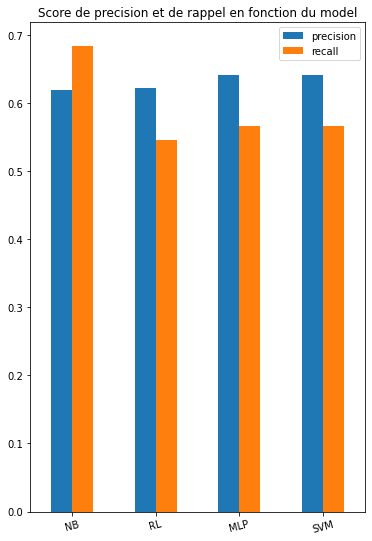

In [ ]:
df_y1_t1_12.plot.bar(figsize=(6,9),rot = 15 ,title = "Score de precision et de rappel en fonction du model")
plt.show(block=True);

In [ ]:
#Y2 ("Writing") precision and recall score comparaison
y2_t1_12 = {"precision":precision_gen(y2_test_2,y2_pred_GNB,y2_pred_RL_11,y2_pred_mlp_11,y2_pred_svm_11),
                      "recall" :recall_gen(y2_test_2,y2_pred_GNB,y2_pred_RL_11,y2_pred_mlp_11,y2_pred_svm_11)}
index = ["NB","RL","MLP","SVM"]
df_y2_t1_12 = pd.DataFrame(y2_t12_1,index=index)

NameError: ignored

In [ ]:
df_y2_t1_12.plot.bar(figsize=(6,9),rot = 15 ,title = "Score de precision et de rappel en fonction du model")
plt.show(block=True);

##### Conclusion

On constate que nos différents models s'en sortent beaucoup mieux avec ce type de classification binaire. Nous avons des scores de précision très elevés au niveau de la classification de l'écriture surtout.

Mais les modèles qui se démarquent le mieux sont ceux du perceptron multicouche et aussi du Support Vector Machine.



# *RÉFÉRENCES*

https://www.kaggle.com/code/chingchunyeh/students-performance-in-exams

https://scikit-learn.org/stable/

https://www.google.com/search?q=Naive+Bayes+with+Multiple+Labels+with+klearn&rlz=1C1CHBF_frCA904CA904&oq=nai&aqs=chrome.1.69i57j69i59l2j69i60l2j69i65l2j69i60.4484j0j7&sourceid=chrome&ie=UTF-8

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://www.youtube.com/watch?v=0Lt9w-BxKFQ

https://www.youtube.com/watch?v=pqNCD_5r0IU&t=1692s

https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

https://www.w3schools.com/python/numpy/numpy_array_indexing.asp

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html


https://stackoverflow.com/questions/63006038/how-to-share-my-google-colaboratory-along-with-data-from-mounted-drive

https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950

https://towardsdatascience.com/what-does-your-classification-metric-tell-about-your-data-4a8f35408a8b